In [1]:
# 일단 구글 드라이브 연동.. 파일 읽기 위함!
from google.colab import drive

drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [2]:
# 파일 읽으려면 pandas 패키지 필요
import os
import pandas as pd


data = pd.read_csv(os.path.join('data','/content/drive/My Drive/Colab Notebooks/AI/[classification]loan_use/loan_data.csv'))
data

,AGE,TOT_LOAN,TOT_LOAN_CRD,LOAN_BNK,LOAN_CPT,CRDT_CNT,GUARN_CNT,INCOME,LOAN_CRD_CNT,LATE_RATE,LATE_RATE_1Y,INS_MON_MAX,CANCEL_CNT_1Y,CALL_TIME,TEL_COST_MON,MOBILE_PRICE,SUSP_DAY,LATE_TEL,COMB_COMM,SEX,PAY_METHOD,JOB,TARGET
0,40,6,6,6,0,0,0,4500,0,16,0,3990.0,0,1.52,120,500,0,120,0,M,A,A,0
1,35,9,9,0,0,1,0,3700,0,9,0,160.0,0,2.14,100,800,0,0,0,M,C,B,0
2,55,9,9,0,0,0,0,6400,0,1,0,260.0,0,0.50,50,700,0,0,0,M,C,B,0
3,55,42,0,42,0,5,0,8900,0,13,30,1990.0,0,2.61,80,900,0,0,0,M,B,C,0
4,40,36,36,36,0,3,1,0,0,2,0,160.0,0,2.11,10,900,0,0,1,F,B,B,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43381,50,63,63,0,0,0,0,4200,0,3,10,790.0,0,0.60,80,400,0,120,0,M,D,D,1
43382,50,0,0,0,0,1,0,3400,0,0,0,30.0,0,1.61,70,0,0,70,0,F,D,D,1
43383,45,42,42,0,42,0,0,6300,0,0,0,300.0,0,0.95,70,0,0,70,0,M,D,D,1
43384,35,0,0,0,0,1,0,4000,0,0,0,590.0,0,0.51,80,400,0,190,0,F,D,D,1


In [3]:
# 카테고리 데이터 전처리
# 1. 일단 카테고리 데이터와 일반 숫자 데이터 분리
data_category = data.loc[:, ['SEX', 'PAY_METHOD', 'JOB']] # 이건 카테고리 데이터
data_category #출력해보자




,SEX,PAY_METHOD,JOB
0,M,A,A
1,M,C,B
2,M,C,B
3,M,B,C
4,F,B,B
...,...,...,...
43381,M,D,D
43382,F,D,D
43383,M,D,D
43384,F,D,D


In [4]:
# get_dummies를 사용해서 범주형(카테고리) 필드 전처리 하기
data_dummy = pd.get_dummies(data_category, columns=['SEX', 'PAY_METHOD', 'JOB'])
data_dummy


,SEX_F,SEX_M,PAY_METHOD_A,PAY_METHOD_B,PAY_METHOD_C,PAY_METHOD_D,JOB_A,JOB_B,JOB_C,JOB_D
0,0,1,1,0,0,0,1,0,0,0
1,0,1,0,0,1,0,0,1,0,0
2,0,1,0,0,1,0,0,1,0,0
3,0,1,0,1,0,0,0,0,1,0
4,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
43381,0,1,0,0,0,1,0,0,0,1
43382,1,0,0,0,0,1,0,0,0,1
43383,0,1,0,0,0,1,0,0,0,1
43384,1,0,0,0,0,1,0,0,0,1


In [5]:
data_numeric = data.drop(columns=['SEX', 'PAY_METHOD', 'JOB'])
data_numeric = pd.concat([data_numeric, data_dummy], axis = 1)
data_numeric

,AGE,TOT_LOAN,TOT_LOAN_CRD,LOAN_BNK,LOAN_CPT,CRDT_CNT,GUARN_CNT,INCOME,LOAN_CRD_CNT,LATE_RATE,LATE_RATE_1Y,INS_MON_MAX,CANCEL_CNT_1Y,CALL_TIME,TEL_COST_MON,MOBILE_PRICE,SUSP_DAY,LATE_TEL,COMB_COMM,TARGET,SEX_F,SEX_M,PAY_METHOD_A,PAY_METHOD_B,PAY_METHOD_C,PAY_METHOD_D,JOB_A,JOB_B,JOB_C,JOB_D
0,40,6,6,6,0,0,0,4500,0,16,0,3990.0,0,1.52,120,500,0,120,0,0,0,1,1,0,0,0,1,0,0,0
1,35,9,9,0,0,1,0,3700,0,9,0,160.0,0,2.14,100,800,0,0,0,0,0,1,0,0,1,0,0,1,0,0
2,55,9,9,0,0,0,0,6400,0,1,0,260.0,0,0.50,50,700,0,0,0,0,0,1,0,0,1,0,0,1,0,0
3,55,42,0,42,0,5,0,8900,0,13,30,1990.0,0,2.61,80,900,0,0,0,0,0,1,0,1,0,0,0,0,1,0
4,40,36,36,36,0,3,1,0,0,2,0,160.0,0,2.11,10,900,0,0,1,0,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43381,50,63,63,0,0,0,0,4200,0,3,10,790.0,0,0.60,80,400,0,120,0,1,0,1,0,0,0,1,0,0,0,1
43382,50,0,0,0,0,1,0,3400,0,0,0,30.0,0,1.61,70,0,0,70,0,1,1,0,0,0,0,1,0,0,0,1
43383,45,42,42,0,42,0,0,6300,0,0,0,300.0,0,0.95,70,0,0,70,0,1,0,1,0,0,0,1,0,0,0,1
43384,35,0,0,0,0,1,0,4000,0,0,0,590.0,0,0.51,80,400,0,190,0,1,1,0,0,0,0,1,0,0,0,1


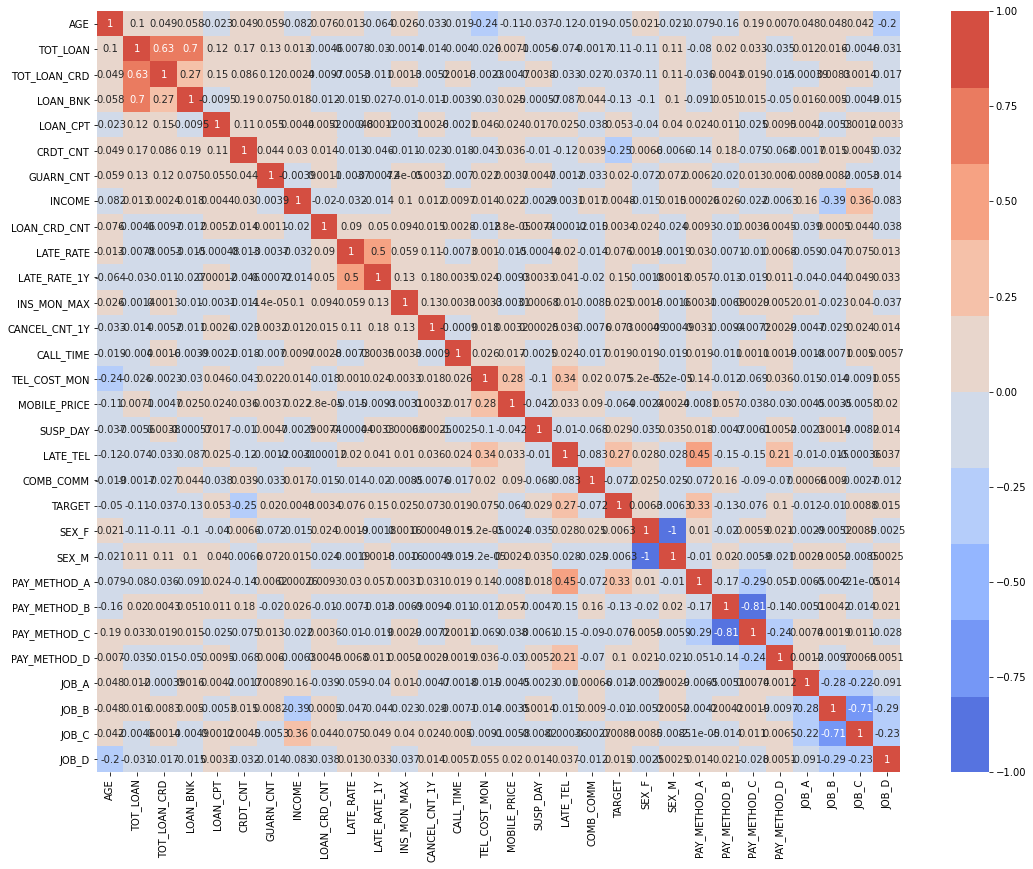

In [8]:
# 쿨 웝 차트 그려보기
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 14)) # 상관계수 -1, 1에 가까울수록 상관관계가 높음, 0에 가까울수록 관계없음
sns.heatmap(data_numeric.corr(), cmap=sns.color_palette("coolwarm", 10), annot=data_numeric.corr())

In [10]:
# 데이터 합치기
data_numeric = data.drop(columns=['SEX', 'PAY_METHOD', 'JOB'])
data_numeric = pd.concat([data_numeric, data_dummy], axis = 1)
data_numeric

,AGE,TOT_LOAN,TOT_LOAN_CRD,LOAN_BNK,LOAN_CPT,CRDT_CNT,GUARN_CNT,INCOME,LOAN_CRD_CNT,LATE_RATE,LATE_RATE_1Y,INS_MON_MAX,CANCEL_CNT_1Y,CALL_TIME,TEL_COST_MON,MOBILE_PRICE,SUSP_DAY,LATE_TEL,COMB_COMM,TARGET,SEX_F,SEX_M,PAY_METHOD_A,PAY_METHOD_B,PAY_METHOD_C,PAY_METHOD_D,JOB_A,JOB_B,JOB_C,JOB_D
0,40,6,6,6,0,0,0,4500,0,16,0,3990.0,0,1.52,120,500,0,120,0,0,0,1,1,0,0,0,1,0,0,0
1,35,9,9,0,0,1,0,3700,0,9,0,160.0,0,2.14,100,800,0,0,0,0,0,1,0,0,1,0,0,1,0,0
2,55,9,9,0,0,0,0,6400,0,1,0,260.0,0,0.50,50,700,0,0,0,0,0,1,0,0,1,0,0,1,0,0
3,55,42,0,42,0,5,0,8900,0,13,30,1990.0,0,2.61,80,900,0,0,0,0,0,1,0,1,0,0,0,0,1,0
4,40,36,36,36,0,3,1,0,0,2,0,160.0,0,2.11,10,900,0,0,1,0,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43381,50,63,63,0,0,0,0,4200,0,3,10,790.0,0,0.60,80,400,0,120,0,1,0,1,0,0,0,1,0,0,0,1
43382,50,0,0,0,0,1,0,3400,0,0,0,30.0,0,1.61,70,0,0,70,0,1,1,0,0,0,0,1,0,0,0,1
43383,45,42,42,0,42,0,0,6300,0,0,0,300.0,0,0.95,70,0,0,70,0,1,0,1,0,0,0,1,0,0,0,1
43384,35,0,0,0,0,1,0,4000,0,0,0,590.0,0,0.51,80,400,0,190,0,1,1,0,0,0,0,1,0,0,0,1


In [ ]:
# X값과 Y값 분리 Y값 = TARGET값 = 예측값 = 결과값
X = data_numeric.drop('TARGET', axis=1)
X

In [13]:
# 예측하고자 하는 TARGET값. 여기서는 연체를 하느냐 마느냐
y = data_numeric['TARGET'].values
y

array([0, 0, 0, ..., 1, 1, 1])

In [14]:
# 학습용 데이터셋과 테스트용 데이터셋을 나누기 학습 : 테스트 를 8 : 2로 나눈다.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20,
                                                    random_state=2019,
                                                    stratify=y)

In [ ]:
#한번씩 출력해보자 학습 데이터 X
X_train

In [ ]:
#한번씩 출력해보자 테스트 데이터 X
X_test

In [ ]:
#한번씩 출력해보자 학습 데이터 y
y_train

In [ ]:
#한번씩 출력해보자 테스트 데이터 y
y_test

# 의사결정나무 모델 만들기


In [15]:
# 의사결정나무 모델 만들기 
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

# 이 한줄로 모델 만들기 끝. 
df = DecisionTreeClassifier(criterion='gini', max_depth=None)
# 학습하기 fit!
df.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [18]:
from sklearn.metrics import accuracy_score, f1_score
y_train_pred = df.predict(X_train)
y_test_pred = df.predict(X_test)

# Show train & validation accuracies
print('- Accuracy (Train)      : {:.4}'.format(accuracy_score(y_train, y_train_pred)))
print('- Accuracy (test) : {:.4}'.format(accuracy_score(y_test, y_test_pred)))
# Show train & validation f1 scores
print('- F1 score (Train)      : {:.4}'.format(f1_score(y_train, y_train_pred)))
print('- F1 score (test) : {:.4}'.format(f1_score(y_test, y_test_pred)))

- Accuracy (Train)      : 1.0
- Accuracy (test) : 0.8908
- F1 score (Train)      : 1.0
- F1 score (test) : 0.4126


In [19]:
# X_train 데이터를 가지고 y값을 예측하면?
df.predict(X_train)

array([1, 0, 0, ..., 0, 1, 0])

In [20]:
# X_test 데이터를 가지고 y값을 예측하면? 
df.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
# 트리 그려보기
from graphviz import Source
from IPython.display import Image
from sklearn.tree import export_graphviz

graph = Source(export_graphviz(df,
                               out_file=None,
                               feature_names=X.columns,
                               filled=True,
                               leaves_parallel=True))
png_bytes = graph.pipe(format='png')
Image(png_bytes)

# 랜덤포레스트 모델 만들기

In [24]:
# 랜덤포레스트 모델 만들기
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='gini', max_depth=None)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [25]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Show train & validation accuracies
print('- Accuracy (Train)      : {:.4}'.format(accuracy_score(y_train, y_train_pred)))
print('- Accuracy (test) : {:.4}'.format(accuracy_score(y_test, y_test_pred)))
# Show train & validation f1 scores
print('- F1 score (Train)      : {:.4}'.format(f1_score(y_train, y_train_pred)))
print('- F1 score (test) : {:.4}'.format(f1_score(y_test, y_test_pred)))

- Accuracy (Train)      : 1.0
- Accuracy (test) : 0.9243
- F1 score (Train)      : 1.0
- F1 score (test) : 0.4282


# 상관도 높은거만 해보자

In [34]:
data_corr = data_numeric[['CRDT_CNT', 'LATE_TEL', 'PAY_METHOD_A']]
X = data_corr

In [35]:
# 학습용 데이터셋과 테스트용 데이터셋을 나누기 학습 : 테스트 를 8 : 2로 나눈다.
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.20,
                                                    random_state=2019,
                                                    stratify=y)

In [36]:
# 랜덤포레스트 모델 만들기
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(criterion='gini', max_depth=None)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [37]:
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Show train & validation accuracies
print('- Accuracy (Train)      : {:.4}'.format(accuracy_score(y_train, y_train_pred)))
print('- Accuracy (test) : {:.4}'.format(accuracy_score(y_test, y_test_pred)))
# Show train & validation f1 scores
print('- F1 score (Train)      : {:.4}'.format(f1_score(y_train, y_train_pred)))
print('- F1 score (test) : {:.4}'.format(f1_score(y_test, y_test_pred)))

- Accuracy (Train)      : 0.9154
- Accuracy (test) : 0.9117
- F1 score (Train)      : 0.3304
- F1 score (test) : 0.2828


# 가라데이터 넣어보기


In [41]:
X_input1 = [[100, 10, 1],]  # 신용카드 100개 발급. 핸드폰요금 연체 10, 핸드폰요금 지불 A ==> 0 예측
X_input2 = [[0, 10, 1],]  # 신용카드 0개 발급. 핸드폰요금 연체 10, 핸드폰요금 지불 A ==> 1 예측

rf.predict(X_input2)

array([1])